## О проекте

### Цель

По предоставленым пробам нефти в трёх регионах требуется решить, где бурить новую скважину. 
Надо построить модель для определения региона, где добыча принесёт наибольшую прибыль, основываясь на известных характеристиках для каждой скважины в регионе.

### План

1. Подготовка и анализ даных.
2. Обучение и проверка модели.
3. Подготовка к расчёту прибыли.
4. Расчёт прибыли по предсказаниям модели и выбраным скважинам
5. Определение риска и прибыли для каждого региона

### Сведения о данных

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек;
- product — объём запасов в скважине (тыс. баррелей).

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

### Загрузка и изучение данных

#### Первый регион

In [2]:
#Открытие данных по первому региоу
data_1=pd.read_csv('/datasets/geo_data_0.csv', sep=',')
data_1.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
data_1[['f0', 'f1', 'f2', 'product']].corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


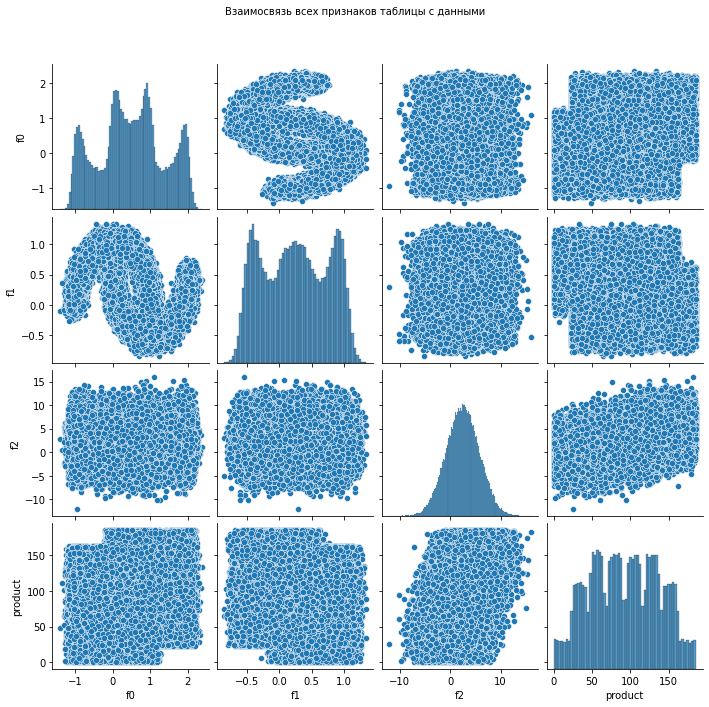

In [5]:
# Визуализация ваимосвязи
sb_plot = sb.pairplot(data_1[['f0', 'f1', 'f2', 'product']])
sb_plot.savefig('pairplot.png')

plt.suptitle('Взаимосвязь всех признаков таблицы с данными', fontsize=10)
plt.subplots_adjust(top=.9)

**Сильной зависимости между числовыми значениями не наблюдается**

In [6]:
# Предположу, что колонка id со сведениями об уникальном идентификатором скважины
#для обучения и работы модели не нужна

new_data_1= data_1.drop('id', axis=1)
new_data_1.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


Text(0.5, 0, 'Признаки')

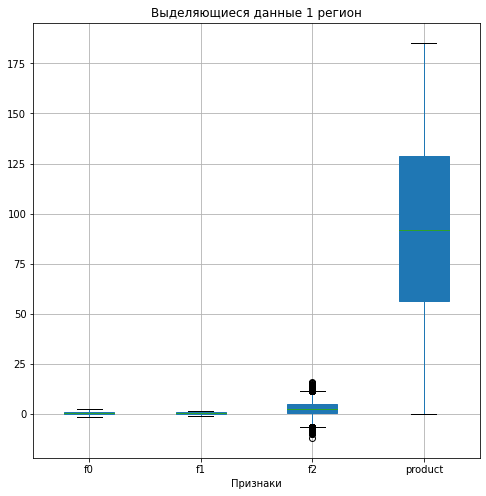

In [7]:
#Проверка выбросов
new_data_1.boxplot(figsize=(8,8), patch_artist='blue')
plt.title('Выделяющиеся данные 1 регион')
plt.xlabel("Признаки")

#### Второй регион

In [8]:
#Открытие данных по второму региоу
data_2=pd.read_csv('/datasets/geo_data_1.csv', sep=',')
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
data_2[['f0', 'f1', 'f2', 'product']].corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


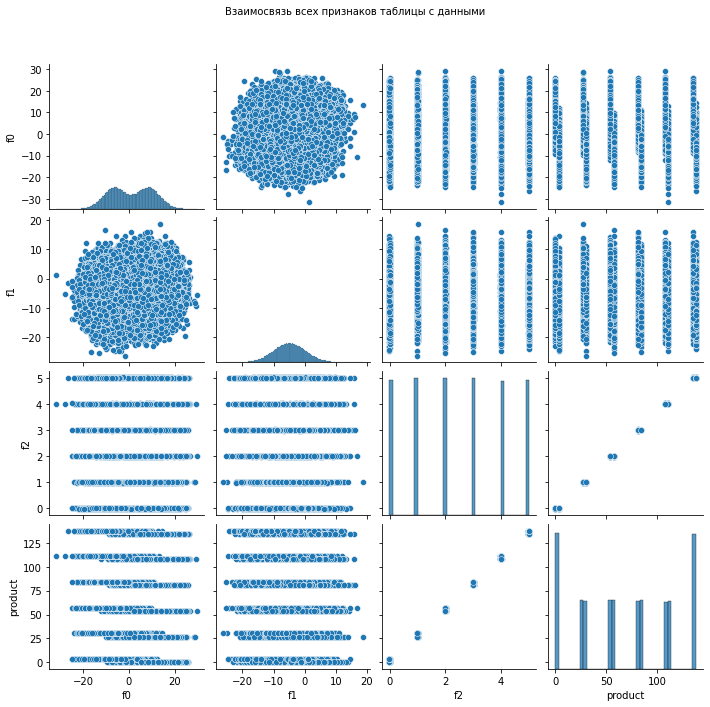

In [11]:
# Визуализация ваимосвязи
sb_plot = sb.pairplot(data_2[['f0', 'f1', 'f2', 'product']])
sb_plot.savefig('pairplot.png')

plt.suptitle('Взаимосвязь всех признаков таблицы с данными', fontsize=10)
plt.subplots_adjust(top=.9)

**Наюблюдается высокая корреляция между признаком f2 и целевым признаком product. Судить о какой-то логической связи числовых факторв (из имеющихся данных) сложно.  Поэтому удалять признак считаю ненужным**

In [12]:
# Предположу, что колонка id со сведениями об уникальном идентификатором скважины
#для обучения и работы модели не нужна

new_data_2= data_2.drop('id', axis=1)
new_data_2.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


Text(0.5, 0, 'Признаки')

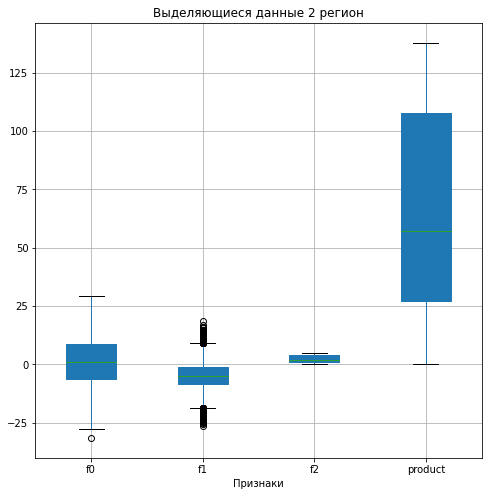

In [13]:
#Проверка выбросов
new_data_2.boxplot(figsize=(8,8), patch_artist='blue')
plt.title('Выделяющиеся данные 2 регион')
plt.xlabel("Признаки")

#### Третий регион

In [14]:
#Открытие данных по третьему региоу
data_3=pd.read_csv('/datasets/geo_data_2.csv', sep=',')
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [15]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [16]:
data_3[['f0', 'f1', 'f2', 'product']].corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


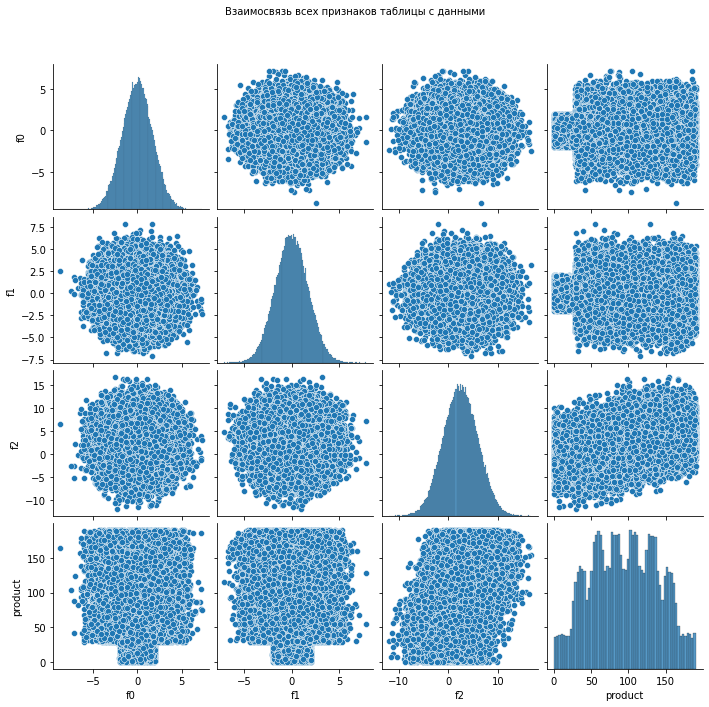

In [17]:
# Визуализация ваимосвязи
sb_plot = sb.pairplot(data_3[['f0', 'f1', 'f2', 'product']])
sb_plot.savefig('pairplot.png')

plt.suptitle('Взаимосвязь всех признаков таблицы с данными', fontsize=10)
plt.subplots_adjust(top=.9)

**Сильной зависимости между числовыми значениями не наблюдается**

In [18]:
# Предположу, что колонка id со сведениями об уникальном идентификатором скважины
#для обучения и работы модели не нужна

new_data_3= data_3.drop('id', axis=1)
new_data_3.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


Text(0.5, 0, 'Признаки')

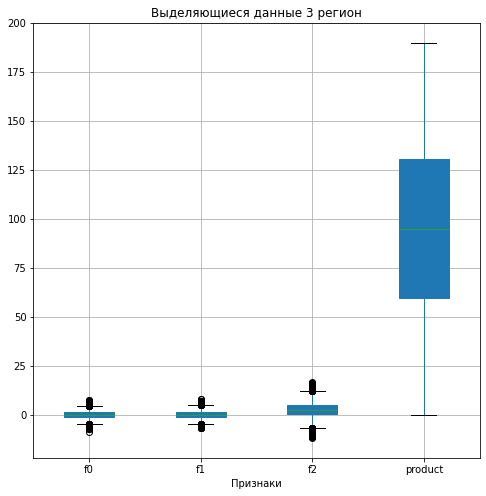

In [19]:
#Проверка выбросов
new_data_3.boxplot(figsize=(8,8), patch_artist='blue')
plt.title('Выделяющиеся данные 3 регион')
plt.xlabel("Признаки")

### Вывод

Каждую из представленных таблиц проаналзировала на наличие пропусков и мультиколлинеарности.
1. Пропусков в таблице не обнаружено.
2. Высокая корреляция наблюдается между числовыми данными второй таблицы (признак и целевой признак). Так как логческую связь между факторами проследить не удаётся, удалять данные не буду.
3. Преобразование категориальных данных не требуется.
4. Маштабировать числовые данные посчитала ненужным, так как разброз значений не существенный.
5. Для корректной работы модели, столбец `id` удалила
6. Анализ данных на выбросы показал наличие выделяющихся значений признаков точек, данные целевого признака распространены равномерно.Выбросы не убирала, поскольку неизвесны характеристики признаков.

## Обучение и проверка модели

**Модель отбельно будет обучена и проверена по даным каждого региона**

### Первый регион

#### Выделение признаков

In [20]:
# Выделение признаков
target_1 = new_data_1['product'] # целевой признак
target_1.shape

(100000,)

In [21]:
features_1 = new_data_1.drop('product', axis=1)
features_1.shape

(100000, 3)

#### Разделение выборок

In [22]:
data_train_1, data_valid_1=train_test_split(new_data_1, test_size=0.25, random_state=12345)
display('Размер тренировочной выборки для первого региога', data_train_1.shape)

'Размер тренировочной выборки для первого региога'

(75000, 4)

In [23]:
display('Размер валидационной выборки для первого региона', data_valid_1.shape)

'Размер валидационной выборки для первого региона'

(25000, 4)

In [24]:
#Выделение признаков выборок
features_train_1 = data_train_1.drop('product', axis=1)
target_train_1 = data_train_1['product']
 
features_valid_1 = data_valid_1.drop('product', axis=1)
target_valid_1 = data_valid_1['product']

#### Обучение и проверка модели

In [25]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predictions_train_1 = model_1.predict(features_train_1) 
predictions_valid_1 = model_1.predict(features_valid_1)

In [26]:
# Вычисление метрики RMSE
rmse_1 = (mean_squared_error(target_valid_1, predictions_valid_1))**0.5
rmse_1

37.5794217150813

In [27]:
# Качество регресси R2
r2_1=r2_score(target_valid_1, predictions_valid_1)
r2_1

0.27994321524487786

In [28]:
#Средний запас предсказанного сырья для первого региона
(predictions_valid_1.mean()).round()

93.0

### Второй регион

#### Выделение признаков

In [29]:
# Выделение признаков
target_2 = new_data_2['product'] # целевой признак
target_2.shape

(100000,)

In [30]:
features_2 = new_data_2.drop('product', axis=1)
features_2.shape

(100000, 3)

#### Разделение выборок

In [31]:
data_train_2, data_valid_2=train_test_split(new_data_2, test_size=0.25, random_state=12345)
display('Размер тренировочной выборки для второго региона', data_train_2.shape)

'Размер тренировочной выборки для второго региона'

(75000, 4)

In [32]:
display('Размер валидационной выборки для второго региона', data_valid_2.shape)

'Размер валидационной выборки для второго региона'

(25000, 4)

In [33]:
#Выделение признаков выборок
features_train_2 = data_train_2.drop('product', axis=1)
target_train_2 = data_train_2['product']
 
features_valid_2 = data_valid_2.drop('product', axis=1)
target_valid_2 = data_valid_2['product']

#### Обучение и проверка модели

In [34]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_train_2 = model_2.predict(features_train_2) 
predictions_valid_2 = model_2.predict(features_valid_2)

In [35]:
# Вычисление метрики RMSE
rmse_2 = (mean_squared_error(target_valid_2, predictions_valid_2))**0.5
rmse_2

0.893099286775617

In [36]:
# Качество регресси R2
r2_2=r2_score(target_valid_2, predictions_valid_2)
r2_2

0.9996233978805127

In [37]:
#Средний запас предсказанного сырья для второго региона
(predictions_valid_2.mean()).round

<function float64.round>

### Третий регион

#### Выделение признаков

In [38]:
# Выделение признаков
target_2 = new_data_2['product'] # целевой признак
target_2.shape

(100000,)

In [39]:
features_2 = new_data_2.drop('product', axis=1)
features_2.shape

(100000, 3)

#### Разделение выборок

In [40]:
data_train_3, data_valid_3=train_test_split(new_data_3, test_size=0.25, random_state=12345)
display('Размер тренировочной выборки для nhtnmtuj региона', data_train_3.shape)

'Размер тренировочной выборки для nhtnmtuj региона'

(75000, 4)

In [41]:
display('Размер валидационной выборки для nhtnmtuj региона', data_valid_3.shape)

'Размер валидационной выборки для nhtnmtuj региона'

(25000, 4)

In [42]:
#Выделение признаков выборок
features_train_3 = data_train_3.drop('product', axis=1)
target_train_3 = data_train_3['product']
 
features_valid_3 = data_valid_3.drop('product', axis=1)
target_valid_3 = data_valid_3['product']

#### Обучение и проврка модели

In [43]:
model_3 = LinearRegression()
model_3.fit(features_train_3, target_train_3)
predictions_train_3 = model_3.predict(features_train_3) 
predictions_valid_3 = model_3.predict(features_valid_3)

In [44]:
# Вычисление метрики RMSE
rmse_3 = (mean_squared_error(target_valid_3, predictions_valid_3))**0.5
rmse_3

40.02970873393434

In [45]:
# Качество регресси R2
r2_3=r2_score(target_valid_3, predictions_valid_3)
r2_3

0.20524758386040443

In [46]:
#Средний запас предсказанного сырья для третьего региона
(predictions_valid_3.mean()).round()

95.0

#### Сравнение метрик разных регионов

In [47]:
#Объединение данных по RMSE разных регионов
rmse=pd.DataFrame({'регионы':['регион 1', 'регион 2', 'регион 3'], 'rmse': [rmse_1, rmse_1, rmse_3]})

Text(0, 0.5, 'Значение')

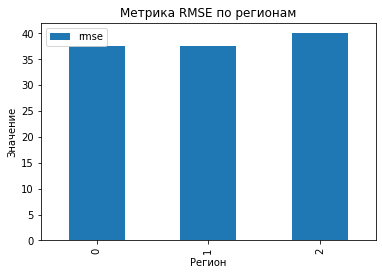

In [48]:
rmse.plot.bar()
plt.title ('Метрика RMSE по регионам')
plt.xlabel("Регион")
plt.ylabel("Значение")

In [49]:
#Объединение данных по R2 разных регионов
r2=pd.DataFrame({'регионы':['регион 1', 'регион 2', 'регион 3'], 'R2': [r2_1, r2_2, r2_3]})

Text(0, 0.5, 'Значение')

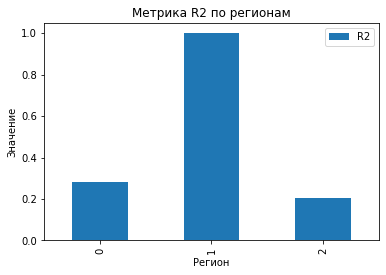

In [50]:
r2.plot.bar()
plt.title ('Метрика R2 по регионам')
plt.xlabel("Регион")
plt.ylabel("Значение")

### Вывод

По данным скважин каждого региона была постоена модели линейной регрессии, а качество её оценено метриками RMSE и R2. <br>
Модель для второго региона имеет лучшее качество среди трёх обученных и провереных. R2- 0.9996233978805127, что свидетельствует о том, что метрика близка к единице, а значит модель предсказывает хорошо. RMSE - 0.893099286775617, т.е. близка к нулю, а значит ошибок при предсказывании очень мало.

## Подготовка к расчёту прибыли

### Основные значения для расчёта

In [51]:
price = 450 #цена 1 барреля
revenue = 450000 # доход с единицы продукта
budget=10000000000 # бюджет на разработку скважин (200 шт)
budget_bor=50000000 #бюджет  на разработку одной скважины
boreholes=500 #количество точек для исследования
best_borehole=200 #лучшие точки по прогнозу для расчёта прибыли
prob_loss=0.025 #вероятность убытка 25%

### Достаточный объём сырья

In [52]:
#Средний объём сырья из скважины в первом регионе
region_1=new_data_1['product'].mean()
region_1

92.50000000000001

In [53]:
#Максимальный объём сырья из скважины в первом регионе
region_max1=new_data_1['product'].max()
region_max1

185.3643474222929

In [54]:
#Средний предсказаный объём сырья из скважины в первом регионе
predict_1=predictions_valid_1.mean()
predict_1

92.59256778438035

In [55]:
#Доход с предсказаного среднего объёма скважыны в первом регионе
revenue_pred1=(predictions_valid_1.mean()*revenue).round()
revenue_pred1

41666656.0

In [56]:
#Средний объём со скважины во втором регионе
region_2=new_data_2['product'].mean()
region_2

68.82500000000002

In [57]:
#Максимальный объём сырья из скважины во втором регионе
region_max2=new_data_2['product'].max()
region_max2

137.94540774090564

In [58]:
#Средний предсказаный объём сырья из скважины во втором регионе
predict_2=predictions_valid_2.mean()
predict_2

68.728546895446

In [59]:
#Доход с предсказаного среднего объёма скважыны во втором регионе
revenue_pred2=(predictions_valid_2.mean()*revenue).round()
revenue_pred2

30927846.0

In [60]:
#Средний объём со скважины в третьем регионе
region_3=new_data_3['product'].mean()
region_3

95.00000000000004

In [61]:
#Максимальный объём сырья из скважины в третьем регионе
region_max3=new_data_3['product'].max()
region_max3

190.0298383433513

In [62]:
#Средний предсказаный объём сырья из скважины в третьем регионе
predict_3=predictions_valid_3.mean()
predict_3

94.96504596800489

In [63]:
#Доход с предсказаного среднего объёма скважыны в третьем регионе
revenue_pred3=(predictions_valid_3.mean()*revenue).round()
revenue_pred3

42734271.0

In [64]:
#Расчёт достаточного объёма сырья для безупыточной разработки скважин

value_barell = budget_bor / revenue
value_barell

111.11111111111111

### Вывод

Не могу с уверенностью сказать, что все основные значения для расчёта готовы, но постаралась обозначить всё, что есть в условии с учётом задания.<br>
Достаточный объём сырья - разность дохода с бюджена на одну скважину и доходом, который она приносит.<br>
Если ошиблась, рассчитываю на совет.

## Расчёт прибыли

### Скважины с максимальными значением предсказаний

In [65]:
#Предсказание максимального значения скважины первого региона
max_pred1=predictions_valid_1.max()
max_pred1

180.18071306125321

In [66]:
#Максимальное значение объёма скважины первого региона
max_real1=new_data_1['product'].max()
max_real1

185.3643474222929

In [67]:
#Предсказание максимального значения скважины второго региона
max_pred2=predictions_valid_2.max()
max_pred2

139.81896981252765

In [68]:
#Максимальное значение объёма скважины второго региона
max_real2=new_data_2['product'].max()
max_real2

137.94540774090564

In [69]:
#Предсказание максимального значения скважины третьего региона
max_pred3=predictions_valid_3.max()
max_pred3

165.85683317435655

In [70]:
#Максимальное значение объёма скважины третьего региона
max_real3=new_data_3['product'].max()
max_real3

190.0298383433513

### Расчёт дохода

In [71]:
#Функция для рсчёта прибыли из 200 скважин
def profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False).head(count) #сортировка 200 предсказанных скважин  
    incom = (target.loc[probs_sorted.index][:count]*revenue).sum() #прибыль с реальной скважины  
    
    return  incom-budget#возвращаем разность прибили с реальной скважины и всех 

## Риск и прибыль для каждого региона

In [72]:
state = np.random.RandomState(12345) 
count=best_borehole

### Первый регион

#### Прибыль

**Для выполнения условий задания (найти распределение прибыли с 1000 выборок) использую техника Bootstrap, применив написаную выше функцию**

In [73]:
#Обозначения для работы функции
probabilities = predictions_valid_1
target = target_valid_1

In [74]:
# Определение средней прибыли и 95%-й доверительного интервала
values_1 = []
target_valid_1 = target_valid_1.reset_index(drop=True)
for i in range(1000):
    target_subsample_1 = target_valid_1.sample(n=boreholes, replace=True, random_state=state)
    probs_subsample_1= pd.Series(probabilities)[target_subsample_1.index]
    values_1.append(profit(target_subsample_1, probs_subsample_1, count))


values_1 = pd.Series(values_1)
lower_1 = values_1.quantile(0.025)
upper_1 = values_1.quantile(0.975)

mean_1 = values_1.mean().round(2)
display('Средняя прибыль', mean_1)
'95%-ый доверительный интервал:', lower_1, ':', upper_1

'Средняя прибыль'

425938526.91

('95%-ый доверительный интервал:', -102090094.83793654, ':', 947976353.358369)

#### Риск убытка

*Чтобы определить вероятность убытка я среди всех 1000 значений прибыли  я найду часть тех, которые больше вложенных средств*

In [75]:
risk_loss_1 =((values_1 < 0).mean()* 100)
'Вероятность убытка', risk_loss_1, '%'

('Вероятность убытка', 6.0, '%')

### Второй регион

In [76]:
#Обозначения для работы функции
probabilities = predictions_valid_2
target = target_valid_2

In [77]:
# Определение средней прибыли и 95%-й доверительного интервала
values_2 = []
target_valid_2 = target_valid_2.reset_index(drop=True)
for i in range(1000):
    target_subsample_2 = target_valid_2.sample(n=500, replace=True, random_state=state)
    probs_subsample_2= pd.Series(probabilities)[target_subsample_2.index]
    values_2.append(profit(target_subsample_2, probs_subsample_2, count))


values_2 = pd.Series(values_2)
lower_2 = values_2.quantile(0.025)
upper_2 = values_2.quantile(0.975)

mean_2 = values_2.mean().round(2)
display('Средняя прибыль', mean_2)
'95%-ый доверительный интервал:', lower_2, ':', upper_2

'Средняя прибыль'

518259493.7

('95%-ый доверительный интервал:', 128123231.43308635, ':', 953612982.0669086)

#### Риск убытка

In [78]:
risk_loss_2 =((values_2 < 0).mean()* 100)
'Вероятность убытка', risk_loss_2, '%'

('Вероятность убытка', 0.3, '%')

### Третий регион

In [79]:
#Обозначения для работы функции
probabilities = predictions_valid_3
target = target_valid_3

In [80]:
# Определение средней прибыли и 95%-й доверительного интервала
values_3 = []
target_valid_3 = target_valid_3.reset_index(drop=True)
for i in range(1000):
    target_subsample_3 = target_valid_3.sample(n=500, replace=True, random_state=state)
    probs_subsample_3= pd.Series(probabilities)[target_subsample_3.index]
    values_3.append(profit(target_subsample_3, probs_subsample_3, count))


values_3 = pd.Series(values_3)
lower_3 = values_3.quantile(0.025)
upper_3 = values_3.quantile(0.975)

mean_3 = values_3.mean().round(2)
display('Средняя прибыль', mean_3)
display('95%-ый доверительный интервал:', lower_3, ':', upper_3)

'Средняя прибыль'

420194005.34

'95%-ый доверительный интервал:'

-115852609.16000956

':'

989629939.8445758

#### Риск убытка

In [81]:
risk_loss_3 =((values_3 < 0).mean()* 100)
'Вероятность убытка', risk_loss_3, '%'

('Вероятность убытка', 6.2, '%')

### Сравнение

In [82]:
# Для сравнения прибыли создаю таблицу
profit_comparison=pd.DataFrame({'регионы':['регион 1', 'регион 2', 'регион 3'], 'прибыль': [mean_1, mean_2, mean_3]})
profit_comparison

,регионы,прибыль
0,регион 1,4.259385e+08
1,регион 2,5.182595e+08
2,регион 3,4.201940e+08


Text(0, 0.5, 'Значение')

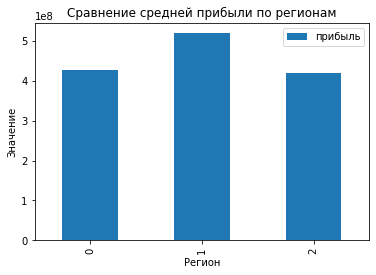

In [83]:
# Визуализация
profit_comparison.plot.bar()
plt.title ('Сравнение средней прибыли по регионам')
plt.xlabel("Регион")
plt.ylabel("Значение")

In [84]:
#Для сравнения вероятности убытков создаю соотвестующую таблицу
risk_loss=pd.DataFrame({'регионы':['регион 1', 'регион 2', 'регион 3'], 'убыток в %': [risk_loss_1, risk_loss_2, risk_loss_3]})
risk_loss

,регионы,убыток в %
0,регион 1,6.0
1,регион 2,0.3
2,регион 3,6.2


Text(0, 0.5, 'Значение')

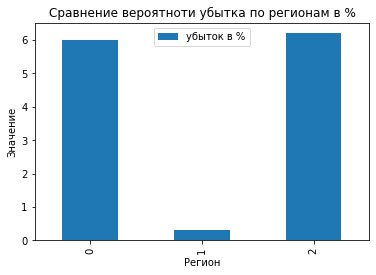

In [85]:
# Визуализация
risk_loss.plot.bar()
plt.title ('Сравнение вероятноти убытка по регионам в %')
plt.xlabel("Регион")
plt.ylabel("Значение")

### Вывод

Для подсчёта прибыли от разработки скважин в разных регионах была написана функция и применена техника Bootstrap. Распределение прибыли найдено по 1000 случайных выборок.<br>
Чтобы рассчитать вероятность убытка, из всех значенияй прибыли по региону нашла те, которые больше вложенных средств (из расчёта на 1000 единиц).<br>
Cамый высокий уровень прибыли и самый низкий ризк убытка показал второй регион.

## Общий вывод

В работе надо было по предоставленым пробам нефти в трёх регионах решить, в каком регионе бурить новую скважину. Для выполнения задачи выполнены следующие шаги:
1. Открыты и проанализорованы таблицы в данными по скважинам трёх регионов:
- пропусков в таблице не обнаружено;
- высокая корреляция наблюдается между числовыми данными второй таблицы, но логческую связь между факторами проследить не удалось, поэтомуудалять данные не стала;
- преобразование категориальных данных не требовалось;
- маштабировать числовые данные посчитала ненужным, так как разброз значений не существенный;
- для корректной работы будуще модели столбец id удалила;
- анализ данных на выбросы показал,что данные целевого признака распространены равномерно.
2. Для каждого региона были выделены признаки, разделены выборки в соотношении 75:25 (тренировочная и валидационная), а также обуена и проверена модель линейной регрессии. Качество модели оценено метриками RMSE и R2. Модель для второго региона имеет лучшее качество среди трёх обученных и провереных. R2- 0.9996233978805127, что свидетельствует о том, что метрика близка к единице, а значит модель предсказывает хорошо. RMSE - 0.893099286775617, т.е. близка к нулю, а значит ошибок при предсказывании очень мало.
3. Определены основные значения для расчёта дохода от разработки скважин, выделены максимальные и средние объёма сырья свкважин.
4. Для подсчёта прибыли от разработки скважин в разных регионах была написана функция и применена техника Bootstrap. Распределение прибыли найдено по 1000 случайных выборок. Вероятность убытка расчитана, из всех значенияй прибыли по региону, которые больше вложенных средств.
5. Cамый высокий уровень прибыли и самый низкий ризк убытка показал второй регион. В остальных регионах прибыть нижеа риск убытков выше.
6 Предположу, что для разработки новых скважин лучше подходт второй регион. Это обуcловлено тем, что средняя прибыль после расчёта во втором регионе превышает прибыль друих. А вероятность убытка ниже пороговых 2.5%. Кроме того, на данных по второму региону модель показала гораздо лучшее качество предсказаний, чем на данных двух других регионов.